# Steady state distribution


To fully understand how Markov Chain Monte Carlo (MCMC) method is used to approximate a posterior distribution, you need to know first how MCs work and how to exploit some facts about MCs to approximate the target distribution.  

In this file I aim at providing a intuitive explanation of the long-term behaviour of irreducible and aperiodic Markov chains. Also, I present a simple example to show how to compute invariant distribution analytically or by simulation. 


**What is Markov process?**

It is a stochastic process (family of random variables X(t)) where the future of the process depends only on the present state i.e the entire history is summerized in the present state. The stochastic process consists of two key sets: index set and state set. The latter contains the possible values that the random variables take.  Let us assume we have n+1 indices t1<t2<t3......tn+1 and n+1 states (X1, X2,....Xn+1), 

P[X(tn+1)=xn+1| X(tn)=xn,......X(t1)=x1]= P[X(tn+1)=xn+1]

**What is Markov chain?**

it is a Markov process with distcrete state space.

**How is MC defined?**

It is defined by the conditional probabilities of going from one state to another. These probabilities form a  transition probability matrix.  The conditional probability Pij is the probability of going from state i to state j. The size of the matrix is determined by the number of states. For instance if the MC is finite with 5 states, the size of the transition probability matrix is 5X5.

There are two properties of the MC we should consider here before we go and talk about the steady state distribution. These are irreducibility and aperiodicity which are explained in the following lecture note: 
https://docs.google.com/viewer?a=v&pid=sites&srcid=ZGVmYXVsdGRvbWFpbnx0aXNocmVlbmJhc2hhcnxneDozNGJhYWIyOWY3ODBmNDJh


Let us demonstrate that using a simple 2-state MC with transition probability matrix given by: 

$P=\begin{bmatrix}
      P_{00} & P_{01}  \\
      P_{10} & P_{11}  
      \end{bmatrix}= \begin{bmatrix}
      0.8 & 0.2  \\
      0.6 & 0.4  
      \end{bmatrix}$




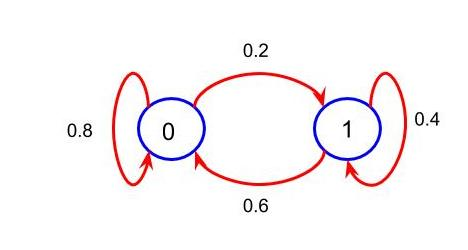

In [26]:
Image(filename='s.jpeg')

We can see from the state transition diagram that the MC is irreducible as each state can communicate with other states. It is also aperiodic as $P_{00}=0.8>0$ or $P_{11}=0.4>0$ i.e a self loop is formed. 


** Steady State Distribution** 

The limiting/steady state/invariant distribution is the probability that the system is in a state when n (number of simulation steps) goes to infinity or to a large number in practise. let us first inspect the short term behaviour of the MC i.e for small n.
 


The state (unconditional) distribution at step n=1 describes the probability of the system in states 0 and 1 after one step. The distribution is based on the previous distribution (n=0) and the transition probabilities. 

$\pi_{0}^{(1)}= \pi_{0}^{(0)} P_{00} + \pi_{1}^{(0)} P_{10} $

$\pi_{1}^{(1)}= \pi_{0}^{(0)} P_{01} + \pi_{1}^{(0)} P_{11} $


This can be computed using matrix multiplication: 

$ [\pi_{0}^{(1)} , \pi_{1}^{(1)}]= [\pi_{0}^{(0)} , \pi_{0}^{(1)}] P $

$ \pi_{0}^{(1)} + \pi_{1}^{(1)} =1 $

What about computing the state distribution after n steps? 
Using Chapman–Kolmogorov Equations, we raise P to the power of n. 
- let us find $ P^{6}$ and $ P^{7}$ and compute the state distribution at n=6 and n=7. 


$ P^{6}=\begin{bmatrix}
      0.75 & 0.25  \\
      0.75 & 0.25  
      \end{bmatrix}$

$ P^{7}=\begin{bmatrix}
      0.75 & 0.25  \\
      0.75 & 0.25  
      \end{bmatrix}$
      
As n becomes large (steady state) , $ P^{n}$ becomes independent of the initial state i.e after 6 steps the prob. of going from state 0 to state 0  =  the prob. of going from state 1 to state 0 = 0.75. 

Having fixed conditional probability makes the state distribution invariant as shown below. 

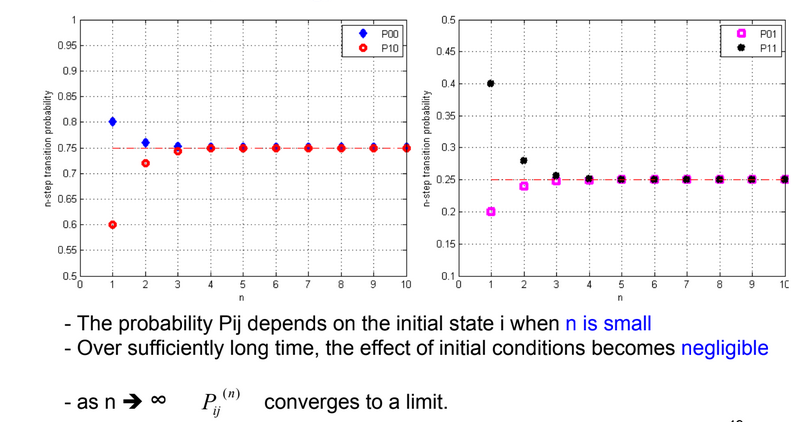

In [27]:
Image(filename='ss.jpeg')

It is time to compute $[\pi_{0}^{(6)} , \pi_{0}^{(6)}]$ which is the state distribution after 6 steps

$ [\pi_{0}^{(6)} , \pi_{1}^{(6)}]= [\pi_{0}^{(0)} , \pi_{1}^{(0)}] P^{6} $


$ \pi_{0}^{(6)}=  \pi_{0}^{(0)} P_{00}^{(6)} + \pi_{1}^{(0)} P_{10}^{(6)}$


Because $P_{00}^{(6)}=P_{10}^{(6)}=0.75$ and $ \pi_{0}^{(1)} + \pi_{1}^{(1)} =1 $ as mentioned above, 

$ \pi_{0}^{(6)}= 0.75 [\pi_{0}^{(0)}  + \pi_{1}^{(0)}]= 0.75 = P_{00}^{(6)}=P_{10}^{(6)}$

$ \pi_{1}^{(6)}= 0.25 [\pi_{0}^{(0)}  + \pi_{1}^{(0)}]= 0.25=P_{01}^{(6)}=P_{11}^{(6)}$


As you can see, if you are given an irreducible and aperiodic MC i.e P is known, and asked to compute the steady state distribution, it is not necessary to know the initial state distributions or at least you can set the initial state distribution to whatever values such as random numbers. All you need to do is rasing P to a sufficiently large number n and then head to the fact that conditonal probabilities after a large number of steps approaches the steady state distribution. 


Since $ \pi^{(6)} = \pi^{(7)} =..........= \pi^{(10000)}$, we end up with the following equations. 

$\pi^{(7)}=[\pi_{0}^{(7)} ,  \pi_{1}^{(7)} ]$

$ \pi^{(7)} = \pi^{(6)} P$    
$ \pi^{(8)} = \pi^{(7)} P$

$ \pi^{(\infty)} = \pi^{(\infty-1)} P$


$\pi=\pi P$   is satisified

This equation enables us to compute the steady state distribution using linear algebra if P is known. In the given example we have two unknown and three equations after you consider $ \pi_{0}^{(1)} + \pi_{1}^{(1)} =1 $. 

## 1- Analytically
lim Pxy(n)=P(y)  as n goes to inf. i.e after large number of steps. To compute Pxy after n steps we rais P to the power of n. 


In [28]:
import numpy as np
import scipy.stats as st
from IPython.display import Image

In [29]:
x=np.array([[0.8, 0.2], [0.6, 0.4]])
d=x

for n in range(100):
    x=d@x
x

array([[ 0.75,  0.25],
       [ 0.75,  0.25]])

In the steady state the probability that the system in state 0 =0.75. it is independent of the initial state. 

## 2- Simulation
The conditional probability can be modelled by binomial ditribution. Since the invariant distribution is equal to conditional distribution when n goes to inf, we draw a large number of samples (say 10000) from the binomial distribution (transition Probability).  The probability that the system in state 0 is the number of 0's divided by 10000.


In [30]:
# Initil state: state=0
state=0
N=10000
counter_0=0
counter_1=0

for n in range(N):
    if state==0:
        counter_0+=1
        t=st.binom.rvs(1,0.2)
    else:
        counter_1+=1
        t=st.binom.rvs(1,0.4)
    state=t

print('The steady state distribution=', [counter_0/N, counter_1/N])

The steady state distribution= [0.7545, 0.2455]


The invariant distribution computed using both methods are similar. 

The simulation method is used in MCMC. 

Now it is time to move to part II. 

** Theorem: Reversible (detailed balance)**

Let P be the transition matrix of a regular (irreducible and aperiodic) Markov chain X(t)  and suppose there exists a distribution $\pi$ such that  $\pi_{i} p_{ij}=\pi_{j} p_{ji}$

for all i,j ∈ S. Then π is a stationary distribution of the chain, and X(t) is reversible.

Proof:
$ \sum_{i=1} \pi_{i} p_{ij} =  \sum_{i=1} \pi_{j} p_{ji} =  \pi_{j} \sum_{i=1} p_{ji}= \pi_{j}  $

So if we start with the detailed balance equation, this can lead to the statinary distribution. and this is the first trick that is used in MCMC